<a href="https://colab.research.google.com/github/InhanPark/Tensorflow/blob/main/ClothingClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이 code 는 10종류 옷과 신발을 구분하는 learning model 을 만드는 것으로


1. data 를 입력 및 확인하고
2. data 를 training 목적에 맞게 변환하고
3. model 을 만들고
4. model 을 compile 하고
5. model 을 training 하고
6.train 된 model 을 적용합니다.

In [1]:
import tensorflow as tf
# TensorFlow library 를 'tf' namespace 로 사용
import numpy as np
# numpy library 를 'np' namespace 로 사용
import matplotlib.pyplot as plt
# matplot library 를 'np' namespace 로 사용

print(tf.__version__)
# tensorflow 의 version 을 확인. Jupyter note 는 마지막 출력만 표시하므로, 중간 출력을 유지하려면 'print' 사용 필요

2.15.0


In [2]:
# Step 1. Fashion MNIST dataset 을 numpy arrays 로 import 하고 확인

fashion_mnist = tf.keras.datasets.fashion_mnist
print(type(fashion_mnist))
# training 과 test data 를 fashion_mnist keras datasets 의 module class 로 받음
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# load_data() method 로 4 NumPy arrays 에 data 저장

print(train_images.shape)
# train data 는 60000 images, 28x28 pixels
print(len(train_labels))
print(train_labels)
# train label 은 60000 labels between 0~9

print(test_images.shape)
# test data 는 10000 images, 28x28 pixels
print(len(test_labels))
print(test_labels)
# train label 은 10000 labels between 0~9

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandle', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# label 들의 실제 이름을 나중에 plotting 하기 위해 저장

<class 'module'>
4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000
[9 2 1 ... 8 1 5]


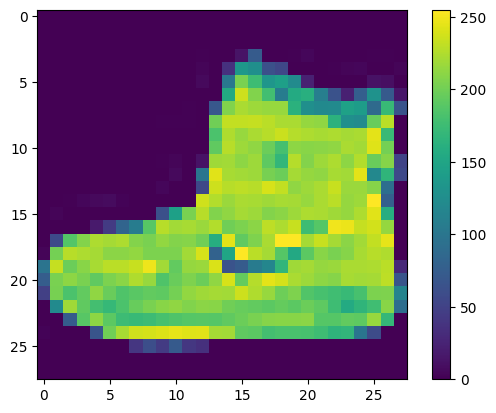

In [3]:
# Step 2. Process the data

# Show image No. 0
plt.figure()
# '.figure' 는 matplotlib 에서 그림 객체를 생성
# figsize, dpi, 배경색, 테두리색 등을 parameter 로 지정 가능
plt.imshow(train_images[0])
# '.imshow'는 RGB data 또는 2D scalar data를 입력받아 image로 출력
plt.colorbar()
# '.colorbar'는 scalar값이 어떤 color로 표시되는지를 보여준다
plt.grid(False)
# '.grid'는 image에 격자를 표기할지를 결정한다
plt.show()

In [4]:
# training set 과 test set 의 숫자를 0~255 integer 에서 0~1 real number 로 변경함
# 입력 변수 값들을 0과 1 사이로 조정하는 것으로, 데이터를 머신러닝에 쓰기 적절하게 만드는 과정이다
train_images = train_images / 255.0
test_images = test_images / 255.0

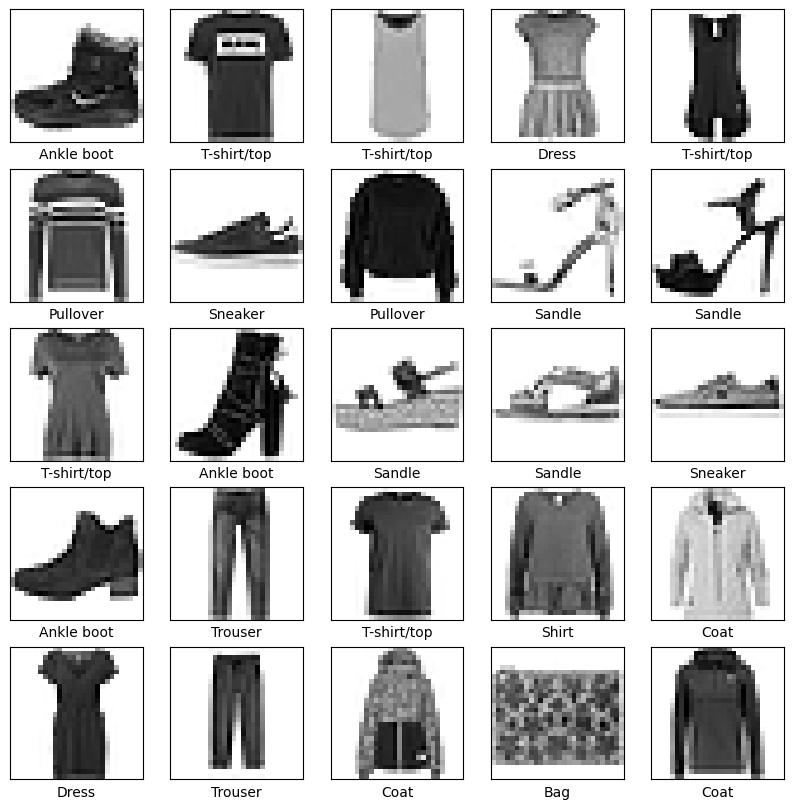

In [5]:
# data 가 제대로 변환 되었는지를 보기위해 25개의 training set 을 display 해 봄
plt.figure(figsize=(10,10))
# figsize를 사용하여 그래프의 크기를 설정한다. 단위는 inch로, 이 경우엔 폭과 높이가 10inch라는 뜻이다
for i in range(25):
    plt.subplot(5,5,i+1)
    # subplot은 현 figure 안에 새로운 plot을 추가한다
    plt.xticks([])
    plt.yticks([])
    # xticks와 ytick은 plot의 눈금을 조정하는데 사용된다
    # 둘을 []로 놓는 것으로, 각 plot의 axis의 label들이 표기가 되지 않게 했다
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # 각 train image를 출력한다
    plt.xlabel(class_names[train_labels[i]])
    # 각 train image 들의 label을 각 subplot의 xlabel로서 표기한다
plt.show()

In [6]:
# Step 3. Build the model

# Set up the layers
# . neural network 의 basic building block 은 layer 임
# . layer 는 입력된 data 에서 representation(?) 을 뽑아낸다. 이것은 문제해결에 도움이 될 수 있다.
# . 이러한 layer 들을 연결해서 deep learning 을 만든다.
# . 'tf.keras.layers.Dense'와 같은 layer 들은 training 중에 학습하는 parameter 가 있다 (경험의 저장)

model = tf.keras.Sequential([
    #Sequential은 입력 layer부터 출력 layer까지 순차적인 구조를 가진 model을 생성하며, 여기에 추가적인 layer를 적용하여 모델을 구성한다

    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(input_shape=(28, 28)),
    #Flatten은 입력된 데이터를 1차원적인 벡터로 평탄화하며, 데이터를 학습하는 데 관여하지 않아 가중치가 없고 데이터를 변경하지 않는다
    tf.keras.layers.Dense(128, activation='relu'),
    #Dense layer는
    #이 함수는 128개의 출력 뉴런과 ReLU활성화 함수를 사용한다
    #출력 뉴런은 이 layer에서 가중치를 주는 것으로 편향되어 나온 값이 출력되는 곳이며, 이게 많을 수록 그만큼의 갯수의 서로 다른 출력 확률을 가진 값이 출력된다
    #그 중, 가장 확률 출력값이 높은 값이 이 모델이 입력값을 판단한 결과가 되는것으로, 출력 뉴런 갯수가 많을수록 입력값을 세부적으로 판단하는 것이 된다
    #활성화 함수는 함수에 입력된 값에 따라 이 값을 전달할것인가 아닌가, 즉 뉴런을 활성화시킬 것인가를 결정한다
    #ReLU함수는 입력값이 0보다 작으면 0을 return한다. 즉 뉴런을 비활성화시킨다
    tf.keras.layers.Dense(10)
])

# Print the model summary
model.summary()

# . 'tf.keras.layers.Flatten'은 2D array 인 image (28*28) 를 행단위로 unstack 하여 1D array (28*28=784pixel)로 만든다.
# . 이 layer 는 학습을 위한 parameter 는 없다. Data reformat 만 한다.
# . 'tf.keras.layers.Dense' layer 2개는 내부적으로 densely connected 되어 있다.
# . 첫번째 dense layer 는 128 node (neuron) 으로 되어있고
# . 두번째 dense layer 는 length 10 의 logit array 를 만든다. 각 logit 은 입력된 image 가 10개 중 어디에 해당하는가 이다.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [7]:
# Step 4. Compile the model
# model 이 training 준비가 되도록 몇가지를 더 추가한다.
# . Optimizer - data 와 loss function 에 따라서 model 이 어떻게 update 되어야 하는지 결정한다
# . Loss Function - training 중에 model 의 정밀도를 측정한다.
# . Metrics - training 과 testing 단계를 monitor 하는데 사용

model.compile(optimizer='adam',
              #optimizer는 어느 함수를 사용하여 모델을 최적화할지 결정한다
              #adam은 효율적이고 메모리 사용량이 낮아 대량의 data와 parameter를 다루는데 좋다
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              #loss는 손실함수를 설정하며, 이 함수는 예측값과 실제값 사이의 차이를 계산하는데, 이때 이 값이 작을수록 좋은 모델이다
              #Categorial Crossentropy계열 함수는 분류 문제에 사용되며, 그중에서도 Spare Categorial Crossentropy는
              #예측값이 [batch_size, num_classes] 형이면서 실제값이 [batch_size] 형태인 경우에 사용한다(무슨 의미인지는 아직 모르겠)
              metrics=['accuracy'])
#metric은 평가 지표를 설정한다
#분류 문제에서는 accuracy 를 평가 지표로 사용한다

In [8]:
# Step 5. Train the model
# Callback function definition
# Callback 함수는 model의 training 도중 지정된 순간에 호출되어 실행되는 함수이다
class myCallback(tf.keras.callbacks.Callback):
  #이 함수는 각 epoch가 끝난 후에 호출되어, loss function의 결과값을 체크한다
  #그 값이 0.4이하이면, 모델의 정확도가 충분하다고 판단하여 training을 그 시점에서 종료시킨다
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nLoss is low so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [9]:
# Step 5-1. Train the model (Feed the model)
# 'model.fit' method 로 train_images 와 train_labels data 를 받아들이고 이 data 에 model 을 fit 한다.
# epoch 가 진행될 떄마다 loss 와 accuracy metrics 가 표시된다.

#fit은 model을 지정된 epochs 만큼 train 시킨다
#여기에서는 model.fit(x,y,epochs,callbacks)의 형식으로 받으며
#x가 input data, y가 target, epochs가 train 횟수, callbacks가 지정한 callback 함수를 받는다
model.fit(train_images, train_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 97s 51ms/step - loss: 0.4388 - accuracy: 0.8399
Epoch 2/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.2934 - accuracy: 0.8927
Loss is low so cancelling training!
1875/1875 [==============================] - 85s 45ms/step - loss: 0.2934 - accuracy: 0.8927


In [10]:
# Step 5-2. Train the model (Evaluate accuracy) (test dataset 으로 model 평가)
# test dataset 의 accuracy 가 training dataset 에 대한것보다 낮다면 overfitting 된 것이다.
# 이것은 model 이 training dataset 의 noise 나 detail 까지 기억하여 발생한 문제이다.

#evaluate는 model의 test하여 loss 값과 metric 값을 return 한다
#여기에서는 model.evaluate(x,y,verbose)의 형식으로 받으며,
#x가 input data, y가 target, verbose는 출력방식을 지정한다
#verbose는 auto = 자동지정(일반적으로 1이 된다), 0 = silent(진행중에 output을 돌려주지 않는다),
#1 = progress bar(진행상황을 progress bar로 보여준), 2 = single line(결과를 한 줄로 보여준다(를 지정할 수 있
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 3s - loss: 0.2886 - accuracy: 0.8973 - 3s/epoch - 11ms/step

Test accuracy: 0.8973000049591064


In [11]:
# Step 5-3. Train the model (Make predictions)
# softmax layer 를 사용하여 linear outputs (logits) 을 확률로 변환하면 해석이 쉽다.

#softmax는 vector of values(value들을 순서대로 한 곳에 모아놓은 것)을 확률분포로 변환하는 역할을 한다
#softmax layer는 activation.softmax 를 불러와서 사용한다
#그러나 activation.softmax는 layer로 사용할 수 없기 때문에 이러한 방식으로 사용된다
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

#predict는 입력받은 값들을 통해 각 값에 대한 결과값을 array 형태로 return한다
predictions = probability_model.predict(test_images)
# prediction 결과를 확인한다. 이 경우는 첫번째에 대해서만 확인
print(predictions[0])
# 이것은 10개의 가능한 결과에 대한 확률이다. 그중에 가장 큰것을 고른다.
print(np.argmax(predictions[0]))
print(test_labels[0])

313/313 [==============================] - 5s 16ms/step
[8.5332149e-06 1.4809877e-06 1.0316661e-06 4.8231544e-07 1.8083207e-07
 7.4514500e-03 2.1413857e-06 2.5025095e-04 1.0923999e-05 9.9227345e-01]
9
9


In [12]:
# 10 class prediction 을 graph 로 한번에 표시할 수 있는 function
#input값으로서 i(image와 label의 index), predictions_array(predict를 사용해서 return된 array), label과 그 label에 연계된 image를 받는다
def plot_image(i, predictions_array, true_label, img):
  #label과 image에서 특정 index에 있는 value를 저장한다
  true_label, img = true_label[i], img[i]
  #이 plot의 눈금선과 x눈금, y눈금을 없앤다
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  #cmap은 Colormap instance로, 입력받은 scalar data를 color로 표시할때 사용되며, 이 함수의 img parameter로 받은 것이 RGB라면 무시된다
  #cm.binary는 color를 흑백으로만 나타낼 때 사용된다
  plt.imshow(img, cmap=plt.cm.binary)
  #argmax는 numpy 함수로, array에 있는 element들의 최댓값들의 index들을 return한다
  predicted_label = np.argmax(predictions_array)
  #예측값이 실제값과 맞을 경우, color를 blue로, 다르다면 red로 설정한다
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  #plot의 xlabel에 예측값 label, 예측 확률중 최대 값, 실제 label을 표시하고, 글자의 color를 예측값이 실제값과 같은지 다른지에 따라 색을 다르게 한다
  plt.xlabel("{} {:2.0f}% ({})". format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)
#input값으로서 실제값들의 index, predict를 통해 return된 array,그리고 실제값들의 label을 받는다
def plot_value_array(i, predictions_array, true_label):
  #입력받은 index값의 index에 있는 실제값 label을 저장한다
  true_label = true_label[i]
  #이 plot의 눈금선과 y눈금을 없애고, x눈금을 0~9까지 설정한다
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  #x축이 0~9, y값이 predictions_array의 element인 bar graph를 그린다
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  #y축의 값을 0~1로 제한한다
  plt.ylim([0, 1])
  #argmax는 numpy 함수로, array에 있는 element들의 최댓값들의 index들을 return한다
  predicted_label = np.argmax(predictions_array)
  #예측값을 red로, 실제값을 blue로 표시한다
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


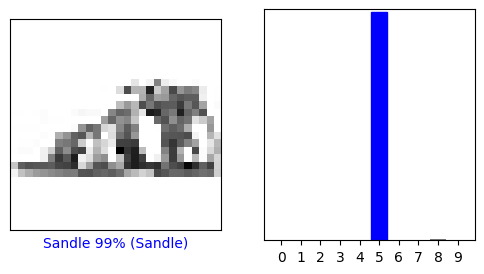

In [13]:

# Step 5-4. Train the model (Verify predictions)
# Single image prediction example
#사용할 index를 11로, image의 size를 가로 6inch, 세로 3inch로, subplot을 두개 생성한다
i = 11
plt.figure(figsize=(6,3))
#첫번째 subplot에 이 index의 test에 사용된 이미지와 model의 예측 결과가 몇%로 맞는지 표시한다
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
#두번째 subplot에 이 index의 test에 사용된 이미지의 라벨의 예측값과 실제값을 표시한다
#둘이 겹쳐져 실제값만이 나오므로, 예측이 맞았다는 뜻이 된다
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

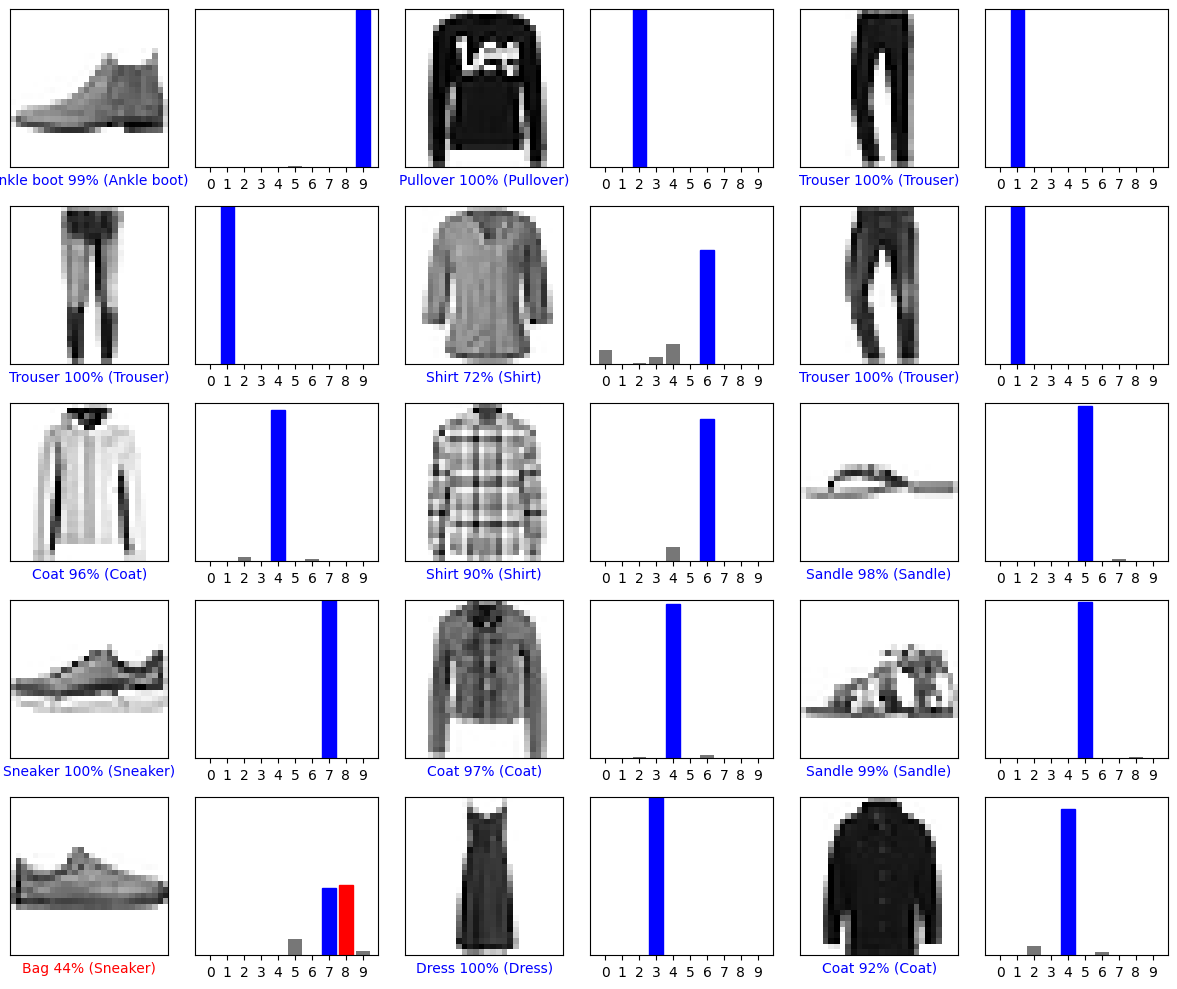

In [14]:
# Several image prediction example
#총 15개의 이미지를 가로 12inch, 세로 6inch의 공간에 표시한다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
#num_images가 15이므로, index가 0~14인 image들을 사용하게 된다
for i in range(num_images):
  #위에서부터 오른쪽으로 subplot이 채워지게 된다
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  #실제 image와 model의 예측값을 xlabel에 표시한다
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  #label을 예측한 결과와 실제 label을 표시한다
  plot_value_array(i, predictions[i], test_labels)
#subplot사이의 공간을 조정한다. 기본값은 1.08inch인것같다
plt.tight_layout()
#plot을 보이게 한다
plt.show()

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 20ms/step
[[1.6052480e-05 3.6886600e-08 9.9970812e-01 1.0206658e-06 1.0729475e-04
  1.3216862e-10 1.6730961e-04 1.7588156e-10 8.2508869e-08 8.8222905e-09]]


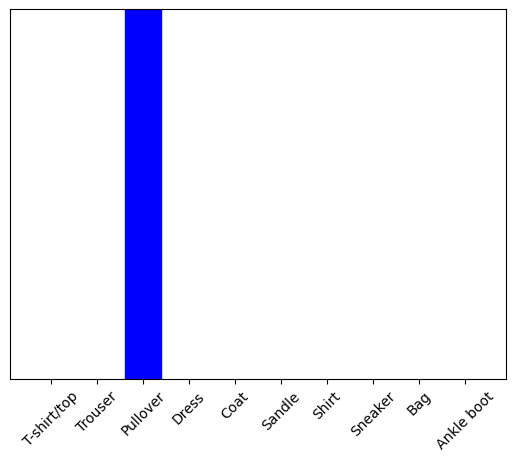

2

In [15]:
# Step 6. Use the trained model

# Grab an image from the test dataset.
#test dataset에 있는 image들 중 index가 1인 image를 불러와 저장한다
img = test_images[1]
#그 이미지의 형태를 출력해보면 가로 28 세로 28임을 알 수 있다
print(img.shape)

# tf.keras model 은 batch 처리에 맞게 되어있으므로, 한개를 처리해도 list 에 넣어야 함
#image array의 0번 index(즉 맨 앞)에 새로운 axis를 넣어 확장시키고, 그 결과를 print한다
img = (np.expand_dims(img,0))
print(img.shape)
#예측 모델로 image를 예측하여, 그 결과를 저장한다
predictions_single = probability_model.predict(img)
#각 label일 확률이 각 index에 표시된 array가 print된
print(predictions_single)
#label의 예측값과 실제값을 bar graph로 표시하며, 이때 x축에 각 label이 대응하는 의류 종류를 작성했다
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()
#예측값 array에서 최댓값을 return한다
np.argmax(predictions_single[0])